### **Real-world Data Representation using tensors**

Scalar values in 
* Consumer Cameras: 8-bit integers
* Medical, scientific, and industrial applications: 12-bit, 16-bit



In [1]:
import os
import torch

import imageio
from matplotlib.pyplot import imshow as ims

In [11]:
img_arr = imageio.imread('./data/p1ch4/image-dog/bobby.jpg')
img_arr.shape # HxWxC

(720, 1280, 3)

PyTorch modules dealing with image data require tensors to be laid out as `C × H × W`:

`channels`, `height`, and `width`, respectively.

### Which could be done using `tensor.permute(**args)` 

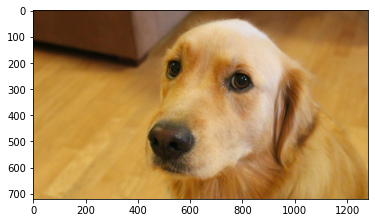

In [8]:
ims(img_arr)

In [14]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)
out.shape # CxHxW

torch.Size([3, 720, 1280])

In [17]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)
batch.shape # NxCxHxW

torch.Size([3, 3, 256, 256])

In [33]:
data_dir = './data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir) \
             if os.path.splitext(name)[-1] == '.png']

for i, filename in enumerate(filenames):
    
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    
    img_t = torch.from_numpy(img_arr).permute(2,0,1)
    print(f"Dim of image {i}: {img_t.shape}")
    batch[i] = img_t[:3]

Dim of image 0: torch.Size([3, 256, 256])
Dim of image 1: torch.Size([3, 256, 256])
Dim of image 2: torch.Size([3, 256, 256])


In [36]:
print(f"Before normalizing: {batch[0, :, :, :]}")
batch = batch.float()
batch /= batch.max()
print(f"After normalizing: {batch[0, :, :, :]}")

Before normalizing: tensor([[[0.6118, 0.5961, 0.4863,  ..., 0.5882, 0.5843, 0.6196],
         [0.6824, 0.5255, 0.6471,  ..., 0.4706, 0.5333, 0.5412],
         [0.4980, 0.6118, 0.4196,  ..., 0.5137, 0.5608, 0.6431],
         ...,
         [0.4549, 0.5098, 0.5059,  ..., 0.4980, 0.4627, 0.4392],
         [0.5059, 0.5098, 0.4824,  ..., 0.4510, 0.4745, 0.4471],
         [0.5059, 0.4824, 0.4627,  ..., 0.4431, 0.4745, 0.4706]],

        [[0.5451, 0.5294, 0.4275,  ..., 0.5294, 0.5294, 0.5765],
         [0.6275, 0.4667, 0.5843,  ..., 0.4118, 0.4784, 0.4863],
         [0.4431, 0.5490, 0.3529,  ..., 0.4627, 0.5059, 0.5961],
         ...,
         [0.3882, 0.4314, 0.4353,  ..., 0.4588, 0.4235, 0.4039],
         [0.4353, 0.4353, 0.4157,  ..., 0.4157, 0.4392, 0.4118],
         [0.4353, 0.4078, 0.4000,  ..., 0.4039, 0.4314, 0.4353]],

        [[0.5059, 0.4824, 0.3843,  ..., 0.5137, 0.5176, 0.5686],
         [0.6078, 0.4314, 0.5373,  ..., 0.4000, 0.4667, 0.4745],
         [0.4078, 0.5176, 0.3137,  ...

In [41]:
dir_path = "./data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape


Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 68/99  (68.799/99  (100.0%)


(99, 512, 512)

In [48]:
vol = torch.from_numpy(vol_arr).float()
vol.shape

torch.Size([99, 512, 512])

In [51]:
vol = vol.unsqueeze(0).shape
vol

torch.Size([1, 99, 512, 512])

In [79]:
with open('./data/p1ch4/jane-austen/1342-0.txt', \
          encoding='utf8') as f:
    text = f.read()

print(text[:200])

﻿The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away 


In [104]:
# One-hot encoding a sentence on a character level

lines = text.split('\n')
print(lines[100])
line = lines[100]

chars_t = torch.zeros((len(lines[100]), 128))
# ASCII has only 128 characters
print(chars_t.shape)

for i, char in enumerate(lines[100].lower().strip()):
    
    if ord(char) <= 128 and ord(char) >= 0: chars_t[i, ord(char)] = 1
    
print(chars_t)

“In such cases, a woman has not often much beauty to think of.”
torch.Size([63, 128])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [105]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

In [106]:
words_in_line = clean_words(line)
line, words_in_line

('“In such cases, a woman has not often much beauty to think of.”',
 ['in',
  'such',
  'cases',
  'a',
  'woman',
  'has',
  'not',
  'often',
  'much',
  'beauty',
  'to',
  'think',
  'of'])

In [124]:
cleaned_words = sorted(set(clean_words(text)))
word2index = {word: i for i, word in enumerate(cleaned_words)}

len(word2index)

7261

In [132]:
words_t = torch.zeros(len(words_in_line), len(word2index))
for i, word in enumerate(words_in_line):
    if word2index.get(word) is not None: 
        words_t[i, word2index[word]] = 1
        print('{:2} {:4} {}'.format(i, word2index[word], word))

 0 3420 in
 1 6292 such
 2 1059 cases
 3  155 a
 4 7165 woman
 5 3113 has
 6 4436 not
 7 4543 often
 8 4307 much
 9  754 beauty
10 6554 to
11 6501 think
12 4519 of


On the other hand, words convey much more meaning than individual characters, so a representation of words is considerably more informative by itself.

### **How can we compress our encoding down to a more manageable size and put a cap on the size growth?**

Well, instead of vectors of many zeros and a single one, we can use vectors of floating-point numbers. A vector of, say, 100 floating-point numbers can indeed represent a large number of words. 

The trick is to find an effective way to map
individual words into this 100-dimensional space in a way that facilitates downstream
learning. This is called an embedding.

## **Exercises**
1. **Take several pictures of red, blue, and green items with your phone or other digital camera (or download some from the internet, if a camera isn’t available).**

    a. Load each image, and convert it to a tensor.
    
    b. For each image tensor, use the .mean() method to get a sense of how bright the image is.

    c. Take the mean of each channel of your images. Can you identify the red, green, and blue items from only the channel averages?
    
    
2. **Select a relatively large file containing Python source code.**

    a. Build an index of all the words in the source file (feel free to make your tokenization as simple or as complex as you like; we suggest starting with replacing r"[^a-zA-Z0-9_]+" with spaces).
    
    b. Compare your index with the one we made for Pride and Prejudice. Which is larger?

    c. Create the one-hot encoding for the source code file.

    d. What information is lost with this encoding? How does that information compare to what’s lost in the Pride and Prejudice encoding?

In [72]:
data_dir = './data/my data'
filenames = os.listdir('./data/my data')

for i, filename in enumerate(filenames):
    
    img_np = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_np).float()
    print(f"Image {i}: Mean= {img_t.mean()}")
    print(f"Channel 1: Mean= {img_t[:,:, 0].mean().item()}")
    print(f"Channel 2: Mean= {img_t[:,:, 1].mean().item()}")
    print(f"Channel 3: Mean= {img_t[:,:, 2].mean().item()}")
    print()
    

Image 0: Mean= 185.72021484375
Channel 1: Mean= 178.8683319091797
Channel 2: Mean= 187.5506134033203
Channel 3: Mean= 190.74171447753906

Image 1: Mean= 192.4494171142578
Channel 1: Mean= 196.90597534179688
Channel 2: Mean= 190.41110229492188
Channel 3: Mean= 190.03118896484375

Image 2: Mean= 137.21185302734375
Channel 1: Mean= 121.736572265625
Channel 2: Mean= 141.80625915527344
Channel 3: Mean= 148.0926971435547



In [68]:
img_t[:,:, 0].mean().item()

178.8683319091797

## **Write a NN to create a word embedding**

In [36]:
import re
from tqdm import tqdm

In [37]:
with open('./data/p1ch4/jane-austen/1342-0.txt', \
          encoding='utf8') as f:
    text = f.read()
    
def clean_words(input_str):
    word_list = input_str.lower().replace('\n',' ').split()

    word_list = [ re.sub(r"[^a-zA-Z0-9_]+"," ", word) for word in word_list]
    word_list = [ (" ".join(word.strip().split())) for word in word_list]
    
    return word_list


In [38]:
words = sorted(set(clean_words(text)))
len(words)

7292

In [39]:
text_tokenized = re.sub(r"[^a-zA-Z0-9_]+"," ", text.lower()).strip().split()
text_tokenized

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'pride',
 'and',
 'prejudice',
 'by',
 'jane',
 'austen',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'title',
 'pride',
 'and',
 'prejudice',
 'author',
 'jane',
 'austen',
 'posting',
 'date',
 'august',
 '26',
 '2008',
 'ebook',
 '1342',
 'release',
 'date',
 'june',
 '1998',
 'last',
 'updated',
 'march',
 '10',
 '2018',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'pride',
 'and',
 'prejudice',
 'produced',
 'by',
 'anonymous',
 'volunteers',
 'pride',
 'a

In [ ]:
class NN:
    
    def __init__(self):
        u = torch.randn((len(words), 100), requires_grad=True, dtype=torch.float32)    
        v = torch.randn((len(words), 100), requires_grad=True, dtype=torch.float32)
        
    


In [45]:
def run(epochs=1, lr=0.01):    
    
    u = torch.randn((len(words), 100), requires_grad=True, dtype=torch.float32)
    
    v = torch.randn((len(words), 100), requires_grad=True, dtype=torch.float32)
    torch.autograd.set_detect_anomaly(True)
    m = 2
    n = 100    
    
    likelihood = 0
    epoch_loss = 0
    
    for epoch in range(epochs):

        for t in tqdm(range(len(text_tokenized[:n]))):
            # Sum over all the text in the corpora
            # print the center and the context for any given window
                
            for j in range(-m, m+1):
                if j == 0 or t+j <0 or t + j >= len(text_tokenized[:n]) : continue
#                 print(text_tokenized[t], text_tokenized[t+j], text_tokenized[:n])
                o, c = t+j, t
                likelihood += torch.exp(u[o, :] @ v[c, :]) / torch.exp((u @ v[c, :])).sum() 

#             print(likelihood)

        loss = - 1/len(text_tokenized[:n]) * torch.log(likelihood)
        
        epoch_loss += loss.item()

        
        print(loss)
        with torch.no_grad():
            u -= lr*u.grad
            v -= lr*v.grad
# #             print((u - lr* loss_u))
            u.grad.zero_()
            v.grad.zero_()

run(2)
# update the parameters

  9%|▉         | 9/100 [00:00<00:01, 80.78it/s]

tensor(0.0393, grad_fn=<MulBackward0>)


100%|██████████| 100/100 [00:01<00:00, 79.20it/s]
/home/siddesh/miniconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:145: UserWarning: Error detected in DivBackward0. Traceback of forward call that caused the error:
  File "/home/siddesh/miniconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/siddesh/miniconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/siddesh/miniconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/siddesh/miniconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/home/siddesh/miniconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/home/siddesh/miniconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling .backward() or autograd.grad() the first time.

In [263]:
u[1, :].shape, v[0, :].shape

(torch.Size([100]), torch.Size([100]))